In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [10]:
!kaggle competitions download -c udea-ai4eng-20241

 24% 5.00M/21.2M [00:00<00:00, 52.0MB/s]
100% 21.2M/21.2M [00:00<00:00, 115MB/s] 


In [11]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [12]:
train = pd.read_csv('train.csv')
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [13]:
estratos = train.groupby(['FAMI_ESTRATOVIVIENDA']).size()
estratos_df = pd.DataFrame(estratos)
estratos_df.columns=['count']
print(estratos_df)

                       count
FAMI_ESTRATOVIVIENDA        
Estrato 1             111991
Estrato 2             232671
Estrato 3             210685
Estrato 4              65514
Estrato 5              23608
Estrato 6              12605
Sin Estrato             3289


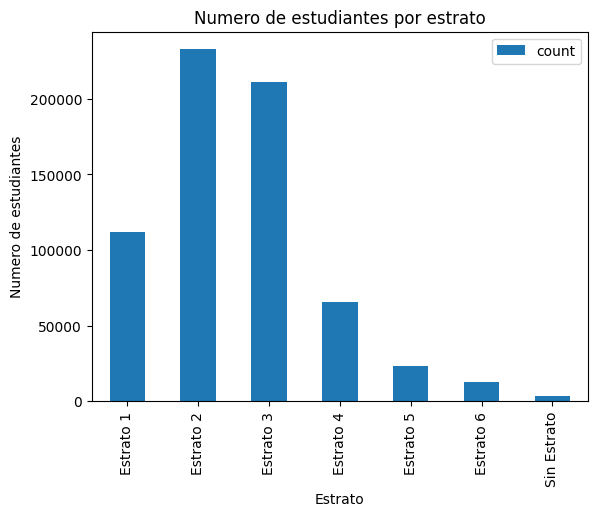

In [16]:
ax=estratos_df.plot.bar()
ax.set_title('Numero de estudiantes por estrato')
ax.set_ylabel('Numero de estudiantes')
ax.set_xlabel('Estrato')
plt.show()

In [17]:
internet = train.groupby(['FAMI_TIENEINTERNET']).size()
internet_df = pd.DataFrame(internet)
internet_df.columns=['count']
print(internet_df)

                     count
FAMI_TIENEINTERNET        
No                   73357
Si                  592514


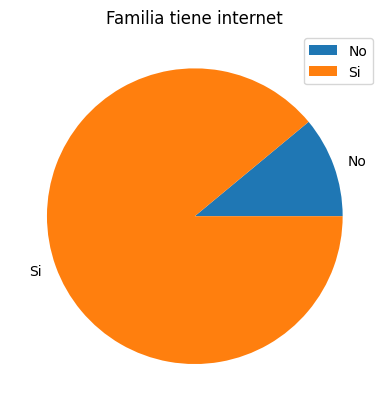

In [18]:
ay=internet_df.plot.pie(y='count')
ay.set_title('Familia tiene internet')
ay.set_ylabel('')
plt.show()

In [19]:
df_pivot = pd.pivot_table(train[['FAMI_ESTRATOVIVIENDA','ESTU_HORASSEMANATRABAJA']],
                          index="FAMI_ESTRATOVIVIENDA",
                          columns="ESTU_HORASSEMANATRABAJA",
                          aggfunc=len, fill_value=0)

print(df_pivot)

ESTU_HORASSEMANATRABAJA      0  Entre 11 y 20 horas  Entre 21 y 30 horas  \
FAMI_ESTRATOVIVIENDA                                                       
Estrato 1                19158                22607                15937   
Estrato 2                33314                40783                32509   
Estrato 3                34454                34446                29171   
Estrato 4                16565                10560                 8742   
Estrato 5                 7095                 3594                 3045   
Estrato 6                 4103                 1777                 1603   
Sin Estrato                508                  643                  462   

ESTU_HORASSEMANATRABAJA  Menos de 10 horas  Más de 30 horas  
FAMI_ESTRATOVIVIENDA                                         
Estrato 1                            18458            34464  
Estrato 2                            29602            94093  
Estrato 3                            24281            86367  
Estra

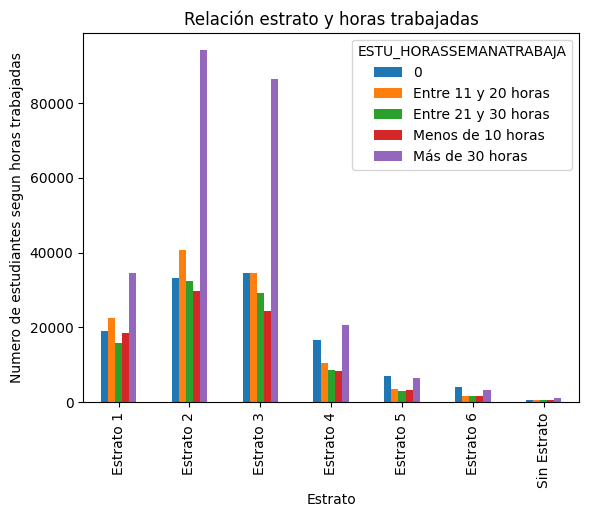

In [20]:
az=df_pivot.plot.bar()
az.set_title('Relación estrato y horas trabajadas')
az.set_ylabel('Numero de estudiantes segun horas trabajadas')
az.set_xlabel('Estrato')
plt.show()